In [1]:
import pandas as pd
import numpy as np

In [2]:
Outletdata = pd.read_csv('/kaggle/input/part2data-set/Outlet Info.csv')
Salesdata = pd.read_csv('/kaggle/input/part2data-set/Sales.csv')

In [3]:
Outlet_Sales = pd.merge(Outletdata, Salesdata, on='outlet_id', how='inner')

In [4]:
print(Outlet_Sales .head())

       outlet_id      region  outlet_size  population_density  \
0  outlet_code_1  outstation         1334                 276   
1  outlet_code_1  outstation         1334                 276   
2  outlet_code_1  outstation         1334                 276   
3  outlet_code_1  outstation         1334                 276   
4  outlet_code_1  outstation         1334                 276   

   number_of_skus_sold  average_household_income  transaction_time  \
0                   16                     81704  2023-01-06 10:51   
1                   16                     81704  2023-01-12 15:14   
2                   16                     81704  2023-01-16 16:25   
3                   16                     81704   2023-01-24 8:55   
4                   16                     81704   2023-02-04 9:53   

  expected_rainfall        freezer_status           sku_name  sales_quantity  
0              60mm   freezers available   Fruit Chewy Bites               4  
1               6mm   freezers

In [5]:
Outlet_Sales.drop_duplicates(inplace=True)

In [6]:
Outlet_Sales.isna().sum()

outlet_id                   0
region                      0
outlet_size                 0
population_density          0
number_of_skus_sold         0
average_household_income    0
transaction_time            0
expected_rainfall           0
freezer_status              0
sku_name                    0
sales_quantity              0
dtype: int64

In [7]:
Outlet_Sales.dtypes

outlet_id                   object
region                      object
outlet_size                  int64
population_density           int64
number_of_skus_sold          int64
average_household_income     int64
transaction_time            object
expected_rainfall           object
freezer_status              object
sku_name                    object
sales_quantity               int64
dtype: object

In [8]:
Outlet_Sales['expected_rainfall'] = Outlet_Sales['expected_rainfall'].str.extract(r'(\d+)').astype(float)

In [9]:
Outlet_Sales['transaction_time'] = pd.to_datetime(Outlet_Sales['transaction_time'])
Outlet_Sales['Date'] = Outlet_Sales['transaction_time'].dt.date
Outlet_Sales['Time'] = Outlet_Sales['transaction_time'].dt.time

In [10]:
Outlet_Sales.dtypes

outlet_id                           object
region                              object
outlet_size                          int64
population_density                   int64
number_of_skus_sold                  int64
average_household_income             int64
transaction_time            datetime64[ns]
expected_rainfall                  float64
freezer_status                      object
sku_name                            object
sales_quantity                       int64
Date                                object
Time                                object
dtype: object

In [11]:
Outlet_Sales.head()

,outlet_id,region,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,Date,Time
0,outlet_code_1,outstation,1334,276,16,81704,2023-01-06 10:51:00,60.0,freezers available,Fruit Chewy Bites,4,2023-01-06,10:51:00
1,outlet_code_1,outstation,1334,276,16,81704,2023-01-12 15:14:00,6.0,freezers available,Fruit Chewy Bites,5,2023-01-12,15:14:00
2,outlet_code_1,outstation,1334,276,16,81704,2023-01-16 16:25:00,82.0,freezers available,Fruit Chewy Bites,5,2023-01-16,16:25:00
3,outlet_code_1,outstation,1334,276,16,81704,2023-01-24 08:55:00,172.0,freezers available,Fruit Chewy Bites,7,2023-01-24,08:55:00
4,outlet_code_1,outstation,1334,276,16,81704,2023-02-04 09:53:00,59.0,freezers available,Fruit Chewy Bites,5,2023-02-04,09:53:00


In [12]:


expected_rainfall_correlation = Outlet_Sales['expected_rainfall'].corr(Outlet_Sales['sales_quantity'])
population_density_correlation = Outlet_Sales['population_density'].corr(Outlet_Sales['sales_quantity'])
outlet_size_correlation = Outlet_Sales['outlet_size'].corr(Outlet_Sales['sales_quantity'])
average_household_income_correlation = Outlet_Sales['average_household_income'].corr(Outlet_Sales['sales_quantity'])
correlation=[expected_rainfall_correlation,population_density_correlation,outlet_size_correlation,average_household_income_correlation]
correlation

[-0.05084327812155448,
 0.25275939302514605,
 0.3950627409237477,
 0.178284490859029]

In [13]:
Outlet_Sales2=Outlet_Sales.sample(1000)

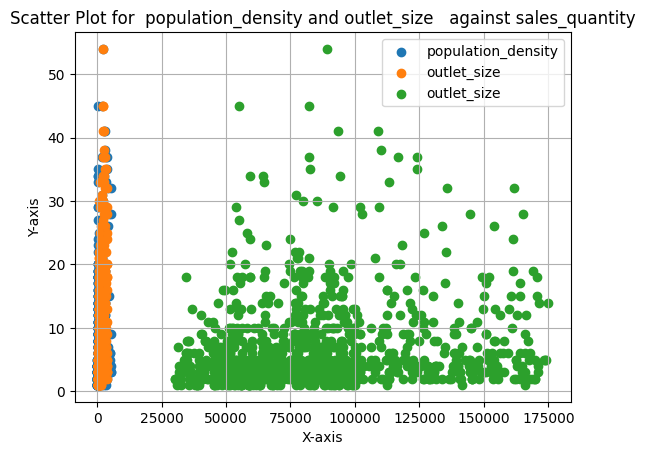

In [14]:
import matplotlib.pyplot as plt

plt.scatter(Outlet_Sales2["population_density"], Outlet_Sales2["sales_quantity"], label='population_density')
plt.scatter(Outlet_Sales2["outlet_size"], Outlet_Sales2["sales_quantity"], label='outlet_size')
plt.scatter(Outlet_Sales2["average_household_income"], Outlet_Sales2["sales_quantity"], label='outlet_size')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot for  population_density and outlet_size   against sales_quantity')
plt.legend()
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

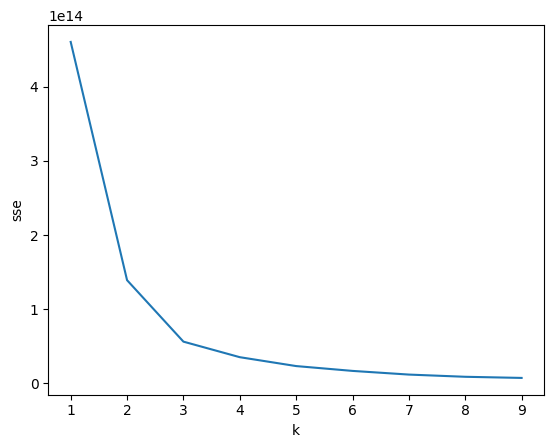

In [15]:
Outlet_Sales2=Outlet_Sales[["sales_quantity","population_density","outlet_size","average_household_income"]]
Outlet_Sales2

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kk=range(1,10)
sse=[]
for k in kk:
    km=KMeans(n_clusters=k)
    km.fit(Outlet_Sales2)
    sse.append(km.inertia_)
sse

plt.xlabel("k")
plt.ylabel("sse")
plt. plot(kk,sse)


In [16]:
from sklearn.cluster import KMeans
num_clusters = 3  # Assuming three clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_predict=kmeans.fit_predict(Outlet_Sales[["sales_quantity","expected_rainfall","population_density","outlet_size","average_household_income"]])


Outlet_Sales['Cluster'] = kmeans.labels_
#cluster_data = data[data['Cluster'] == chosen_cluster]

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
np.unique(y_predict)


array([0, 1, 2], dtype=int32)

In [18]:
Outlet_Sales.head()

,outlet_id,region,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,freezer_status,sku_name,sales_quantity,Date,Time,Cluster
0,outlet_code_1,outstation,1334,276,16,81704,2023-01-06 10:51:00,60.0,freezers available,Fruit Chewy Bites,4,2023-01-06,10:51:00,0
1,outlet_code_1,outstation,1334,276,16,81704,2023-01-12 15:14:00,6.0,freezers available,Fruit Chewy Bites,5,2023-01-12,15:14:00,0
2,outlet_code_1,outstation,1334,276,16,81704,2023-01-16 16:25:00,82.0,freezers available,Fruit Chewy Bites,5,2023-01-16,16:25:00,0
3,outlet_code_1,outstation,1334,276,16,81704,2023-01-24 08:55:00,172.0,freezers available,Fruit Chewy Bites,7,2023-01-24,08:55:00,0
4,outlet_code_1,outstation,1334,276,16,81704,2023-02-04 09:53:00,59.0,freezers available,Fruit Chewy Bites,5,2023-02-04,09:53:00,0


In [19]:
Outlet_Sales["Cluster"].unique()

array([0, 1, 2], dtype=int32)

In [20]:
outletgroups=Outlet_Sales.groupby(["Cluster","outlet_id"]) ["sales_quantity"].sum()
outletgroups

Cluster  outlet_id       
0        outlet_code_1        572
         outlet_code_100      905
         outlet_code_1000     174
         outlet_code_1003     586
         outlet_code_1006     487
                             ... 
2        outlet_code_97      1508
         outlet_code_974      680
         outlet_code_975      761
         outlet_code_99       253
         outlet_code_995      743
Name: sales_quantity, Length: 4200, dtype: int64

In [21]:
Cluster1=Outlet_Sales[Outlet_Sales["Cluster"]==0].describe()

In [22]:
Cluster2=Outlet_Sales[Outlet_Sales["Cluster"]==1].describe()
Cluster2

,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,sales_quantity,Cluster
count,140010.000000,140010.000000,140010.000000,140010.000000,140010,140010.000000,140010.000000,140010.0
mean,1132.756960,300.511906,15.568688,54587.473938,2023-03-17 19:07:21.740304128,71.282858,5.394550,1.0
min,200.000000,100.000000,10.000000,30022.000000,2023-01-02 08:00:00,0.000000,1.000000,1.0
25%,740.000000,215.000000,12.000000,48524.000000,2023-02-08 10:45:15,31.000000,2.000000,1.0
50%,983.000000,307.000000,13.000000,55415.000000,2023-03-17 12:49:30,61.000000,4.000000,1.0
75%,1373.000000,399.000000,18.000000,63050.000000,2023-04-24 15:03:00,92.000000,7.000000,1.0
max,3986.000000,649.000000,35.000000,72383.000000,2023-05-31 17:28:00,199.000000,53.000000,1.0
std,778.737387,123.589300,5.599172,10778.772994,NaN,52.263775,5.121443,0.0


In [23]:
Cluster3=Outlet_Sales[Outlet_Sales["Cluster"]==2].describe()
Cluster3

,outlet_size,population_density,number_of_skus_sold,average_household_income,transaction_time,expected_rainfall,sales_quantity,Cluster
count,73886.000000,73886.000000,73886.000000,73886.000000,73886,73886.000000,73886.000000,73886.0
mean,1494.257424,3057.095634,44.519611,145819.468438,2023-03-17 18:09:13.142408448,53.324595,8.555938,2.0
min,287.000000,2062.000000,33.000000,118099.000000,2023-01-02 08:00:00,0.000000,1.000000,2.0
25%,399.000000,2446.000000,39.000000,131537.000000,2023-02-08 10:27:15,23.000000,3.000000,2.0
50%,1358.000000,2808.000000,44.000000,144943.000000,2023-03-17 13:04:00,46.000000,5.000000,2.0
75%,1619.000000,3311.000000,49.000000,160362.000000,2023-04-24 15:06:00,68.000000,11.000000,2.0
max,4000.000000,5800.000000,60.000000,174995.000000,2023-05-31 17:29:00,149.000000,68.000000,2.0
std,1018.902866,879.867713,6.201453,16526.209176,NaN,39.320207,8.188855,0.0
